# Tarea 2: Derivación numérica

Fecha de envío del PR inicial: **martes 14 de marzo**

Fecha de aceptación del PR: **lunes 20 de marzo**

## Ejercicio 1: Derivada *derecha*

(a) Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la aproximación de la derivada, que se basa en su definición:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

lo que requiere la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

(b) A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). 

Para ser concretos, prueben su implementación de `derivada_derecha` con la función de prueba $f(x) = 3x^3-2$, en $x_0=1$. Dibujen, como función de $h$, el error de su cálculo; usen escala logarítmica en ambos ejes. A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada, o sea, cómo nos acercamos al valor *exacto* de la deriva al considerar $lim_{h\to 0}$? 


In [1]:
doc"""
derivada_derecha(f,h,x0)

Esta función calcula la derivada derecha de una función utilizando la expresión:

\$f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h}\$

Su estructura es la siguiente:

derivada_derecha([función],[h],[x0])

Por defecto \$x_0=0.0\$

"""

function derivada_derecha(f,h,x0 = 0.0)
    # código
    num=f(x0+h)-f(x0) #Numerador
    deno=h            #Denominador
    
    derivada=num/deno
    
    return derivada 
    
end

derivada_derecha

In [2]:
methods(derivada_derecha)

# 2 methods for generic function "derivada_derecha":
derivada_derecha(f, h) at In[1]:18
derivada_derecha(f, h, x0) at In[1]:18

In [3]:
?derivada_derecha

search:



derivada_derecha(f,h,x0)

Esta función calcula la derivada derecha de una función utilizando la expresión:

$f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h}$

Su estructura es la siguiente:

derivada_derecha([función],[h],[x0])

Por defecto $x_0=0.0$


In [4]:
#Función a evaluar
function f(x)
    return 3x^3-2
end

f (generic function with 1 method)

Cálculo analítico de la derivada

Aplicando la fórmula para la derivada a la función $f(x)=3x³-2$ con $x_0=1$ tenemos: $\lim_{h \to 0} \frac{(3(x_0+h)³-2)-(3x_0³-2)}{h} = \lim_{h \to 0} \frac{(3(h³+3h²x_0+3hx_0²+x_0³)-2)-(3x_0³-2)}{h}=\lim_{h \to 0}  \frac{(3h³+9h²x_0+9hx_0²+3x_0³-2)-(3x_0³-2)}{h} = \lim_{h \to 0} \frac{3h³+9h²x_0+9hx_0²+3x_0³-2-3x_0³+2}{h}=\lim_{h \to 0}  \frac{3h³+9h²x_0+9hx_0²}{h}=\lim_{h \to 0} \frac{h(3h²+9hx_0+9x_0²)}{h} =\lim_{h \to 0}  (3h²+9hx_0+9x_0²) =9x_0²$ 
como $x_0=1$ entonces $\lim_{h \to 0} \frac{(3(x_0+h)³-2)-(3x_0³-2)}{h} =9$

In [5]:
deri=derivada_derecha(f,0.00000000001,1.0)

9.000000744663339

Cálculo del error absoluto

In [6]:
Error_absoluto=abs(deri-9)

7.446633389918134e-7

Para obtener un vector con los valores de h, generamos el vector v1 con valores aleatorios en el intervalo [0,1).En general, dichos valores no son muy chicos, por ello, se hace un segundo vector v2 con valores sean más pequeños en [0,1). De este modo, podemos hacer un vector_h que contega los valores de v1 y v2.

In [7]:
v1=rand(10^2)

100-element Array{Float64,1}:
 0.155499 
 0.0717857
 0.100555 
 0.985491 
 0.451138 
 0.722861 
 0.0832608
 0.676134 
 0.632424 
 0.512358 
 0.813268 
 0.0982066
 0.830169 
 ⋮        
 0.637055 
 0.708734 
 0.682193 
 0.411527 
 0.0147118
 0.108235 
 0.415726 
 0.898717 
 0.806221 
 0.362043 
 0.390126 
 0.36993  

In [8]:
v2=abs(rand(10^2)/1e14)

100-element Array{Float64,1}:
 8.84652e-15
 3.49902e-15
 5.88008e-15
 9.01787e-15
 8.89409e-15
 8.30866e-15
 6.83833e-15
 1.93351e-15
 5.48779e-16
 3.93818e-15
 6.17526e-15
 8.63706e-16
 8.30428e-15
 ⋮          
 3.64121e-15
 4.37804e-15
 8.36987e-15
 4.97326e-15
 7.63781e-15
 2.12954e-15
 2.00953e-15
 5.80577e-15
 8.20485e-15
 7.32981e-15
 4.18232e-15
 2.40794e-15

In [9]:
vector_h=sort(append!(v2,v1))

200-element Array{Float64,1}:
 1.50349e-16
 2.59189e-16
 3.08494e-16
 3.132e-16  
 5.48779e-16
 6.97321e-16
 7.24147e-16
 8.63706e-16
 9.55571e-16
 1.08971e-15
 1.24536e-15
 1.28023e-15
 1.28979e-15
 ⋮          
 0.830169   
 0.837786   
 0.843066   
 0.859077   
 0.876008   
 0.887339   
 0.898717   
 0.899422   
 0.962913   
 0.971994   
 0.983025   
 0.985491   

In [10]:
len=length(vector_h) #Cantidad de valores de h
error=[] #Vector vacio que será llenado con los valores de error para cada h.
#der=[]
for i=1:len
    
   derivadas=derivada_derecha(f,vector_h[i],1.0)#Valor de la derivada para cada h.
    
    Error_absoluto=abs(derivadas-9)#Valor del error para cada derivada. 
    #println(i,"\t",Error_absoluto)
    #println(i,"\t",derivadas)
    #push!(der,derivadas)
    push!(error,Error_absoluto)#Agregamos los valores de error obtenidos al vector. 
    
end

In [11]:
error

200-element Array{Any,1}:
  2.81486  
  2.14649  
  3.24185  
  3.32837  
  1.71691  
  0.0840909
  0.414388 
  0.255009 
  0.634731 
  0.0343624
  0.628096 
  0.365824 
  0.296379 
  ⋮        
  9.53906  
  9.64574  
  9.71987  
  9.94573  
 10.1862   
 10.3482   
 10.5115   
 10.5217   
 11.4478   
 11.5823   
 11.7462   
 11.783    

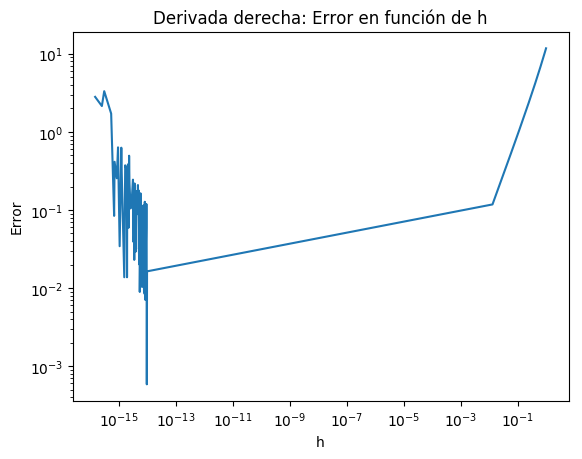

In [12]:
using PyPlot

plot(vector_h,error)#Vectores a graficar: plot([vector de valores para el eje X],[vector de valores para el eje Y])
#plot(vector_h,derivadas)
xlabel("h") #Etiqueta para el eje X
ylabel("Error")#Etiqueta para el eje Y
title("Derivada derecha: Error en función de h")#Título de la gráfica

xscale("log")#Escala logarítmica para el eje X
yscale("log")#Escala logarítmica para el eje Y

show()




El error disminuye confome damos una h más pequeña

## Ejercicio 2: Derivada simétrica

Repitan el ejercicio anterior usando la aproximación que se basa en la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}

¿Qué pueden concluir respecto a la convergencia? ¿Cómo se compara este algoritmo con el del ejercicio anterior?

In [13]:
doc"""
derivada_simetrica(f,h,x0)

Esta función calcula la derivada simetrica de una función utilizando la expresión:

\$f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}\$

Su estructura es la siguiente:

derivada_simetrica([función],[h],[x0])

Por defecto \$x_0=0.0\$

"""

function derivada_simetrica(f,h,x0 = 0.0)
    
    num=f(x0+h)-f(x0-h)
    deno=2*h
    
    derivada=num/deno
    
    return derivada 
    
end

derivada_simetrica

In [14]:
?derivada_simetrica

search:



derivada_simetrica(f,h,x0)

Esta función calcula la derivada simetrica de una función utilizando la expresión:

$f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}$

Su estructura es la siguiente:

derivada_simetrica([función],[h],[x0])

Por defecto $x_0=0.0$


In [15]:
derivada_simetrica(f,0.00000000001,1.0)

9.000000744663339

In [15]:
error_2=[]#Vector vacio que será llenado con los valores de error para cada h.

for i=1:len
    
   derivadas_2=derivada_simetrica(f,vector_h[i],1.0)#Valor de la derivada para cada h.
    
    Error_absoluto_2=abs(derivadas_2-9)#Valor del error para cada derivada. 

    push!(error_2,Error_absoluto_2)#Agregamos los valores de error obtenidos al vector. 
    
end

In [16]:
error_2

200-element Array{Any,1}:
 0.138855 
 2.14649  
 1.08255  
 1.2015   
 0.90768  
 0.0840909
 0.19887  
 0.255009 
 0.169994 
 0.0343624
 0.2715   
 0.365824 
 0.296379 
 ⋮        
 2.06754  
 2.10566  
 2.13228  
 2.21404  
 2.30217  
 2.36211  
 2.42307  
 2.42688  
 2.78161  
 2.83432  
 2.89901  
 2.91357  

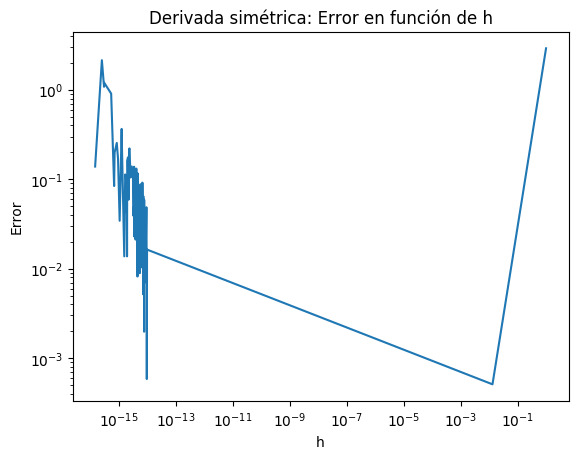

In [17]:
using PyPlot

plot(vector_h,error_2)#Vectores a graficar: plot([vector de valores para el eje X],[vector de valores para el eje Y])
#plot(vector_h,derivadas_2)
xlabel("h") #Etiqueta para el eje X
ylabel("Error") #Etiqueta para el eje Y
title("Derivada simétrica: Error en función de h")#Título de la gráfica

xscale("log")#Escala logarítmica para el eje X
yscale("log")#Escala logarítmica para el eje Y

show()


En general el error es difectamente proporcional a h, excepto en cierto intervalo. 

## Ejercicio 3: Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Esto es, nos basaremos en la definición de la derivada dada por:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [18]:
doc"""
derivada_compleja(f,h,x0)

Esta función calcula la derivada compleja de una función utilizando la expresión:

\$f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big)\$

Su estructura es la siguiente:

derivada_compleja([función],[h],[x0])

Por defecto \$x_0=0.0\$

Sólo se muestra la parte imaginaria del resultado.
"""

function derivada_compleja(f,h,x0 = 0.0)
    
    num=f(x0+h*im)
    deno=h
    
    derivada=num/deno
    
    return imag(derivada) #Sólo se muestra la parte imaginaria del resultado.
    
end

derivada_compleja

In [19]:
?derivada_compleja

search:



derivada_compleja(f,h,x0)

Esta función calcula la derivada compleja de una función utilizando la expresión:

$f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big)$

Su estructura es la siguiente:

derivada_compleja([función],[h],[x0])

Por defecto $x_0=0.0$

Sólo se muestra la parte imaginaria del resultado.


In [20]:
derivada_compleja(f,0.00000000001,1.0)

9.0

In [21]:
error_3=[]#Vector vacio que será llenado con los valores de error para cada h.

for i=1:len
    
   derivadas_3=derivada_compleja(f,vector_h[i],1.0)#Valor de la derivada para cada h.
    
    Error_absoluto_3=abs(derivadas_3-9)#Valor del error para cada derivada. 

    push!(error_3,Error_absoluto_3)#Agregamos los valores de error obtenidos al vector. 
    
end

In [22]:
error_3

200-element Array{Any,1}:
 0.0        
 1.77636e-15
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 1.77636e-15
 0.0        
 0.0        
 1.77636e-15
 1.77636e-15
 ⋮          
 2.06754    
 2.10566    
 2.13228    
 2.21404    
 2.30217    
 2.36211    
 2.42307    
 2.42688    
 2.78161    
 2.83432    
 2.89901    
 2.91357    

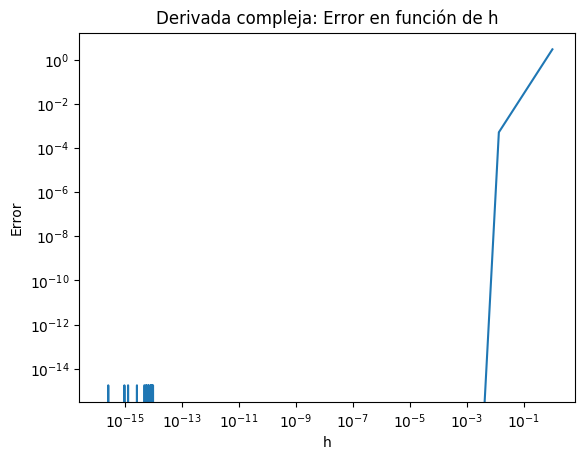

In [23]:
using PyPlot

plot(vector_h,error_3)#Vectores a graficar: plot([vector de valores para el eje X],[vector de valores para el eje Y])
#plot(vector_h,derivadas_2)
xlabel("h") #Etiqueta para el eje X
ylabel("Error") #Etiqueta para el eje Y
title("Derivada compleja: Error en función de h")#Título de la gráfica

xscale("log")#Escala logarítmica para el eje X
yscale("log")#Escala logarítmica para el eje Y

show()

## Ejercicio 4: Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

- ¿Qué comportamiento mostrado por las derivadas en términos de $h$ nos incomoda más? ¿A qué atribuyen esto?